# Preguntas del catálogo #3 - PAID

## Ignacio Grané Rojas - 2019380056
## Avances de tareas cortas
## Bloque 3

### Instalaciones previas

In [1]:
!pip install matplotlib
!pip install opencv-python
!pip install numpy

### Imports necesarios

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from numpy.linalg import svd
from scipy.linalg import diagsvd

In [3]:
graphics_toolkit('gnuplot')
pkg load image
pkg load signal


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.


## Pregunta #1

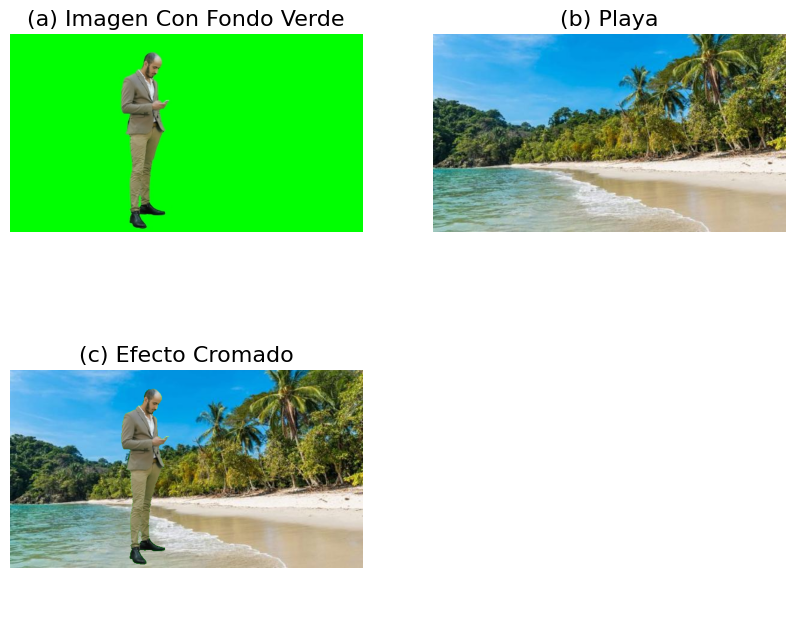

In [4]:
def fondo_verde(A, B):
    # Esta función asume que A es una imagen con fondo verde
    # B es una imagen de fondo en general.
    # C es el resultado de sustituir el fondo verde de A
    # con los pixeles de la imagen B
    # (Asumimos que A y B son de color y del mismo tamaño)

    # Convertir imágenes a arrays de numpy
    A = np.array(A)
    B = np.array(B)
    
    # Crear las máscaras basadas en el color verde
    mask1 = (A[:, :, 1] >= 125) & (A[:, :, 0] < 100) & (A[:, :, 2] < 100)
    mask2 = ~mask1

    # Imagen A con fondo negro en lugar de verde
    C1 = np.zeros_like(A)
    C1[:, :, 0] = A[:, :, 0] * mask2
    C1[:, :, 1] = A[:, :, 1] * mask2
    C1[:, :, 2] = A[:, :, 2] * mask2

    # Imagen B con negro en los pixeles de la imagen que no es verde de A
    C2 = np.zeros_like(B)
    C2[:, :, 0] = B[:, :, 0] * mask1
    C2[:, :, 1] = B[:, :, 1] * mask1
    C2[:, :, 2] = B[:, :, 2] * mask1

    # Combinar las imágenes modificadas
    C = C1 + C2
    return Image.fromarray(C)

# Cargar imágenes
A = Image.open('fondo_verde.jpg')
B = Image.open('playa.jpg')

# Llamar a la función y mostrar resultados
C = fondo_verde(A, B)

# Mostrar las imágenes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(A)
axs[0, 0].set_title('(a) Imagen Con Fondo Verde', fontsize=16)
axs[0, 0].axis('off')

axs[0, 1].imshow(B)
axs[0, 1].set_title('(b) Playa', fontsize=16)
axs[0, 1].axis('off')

axs[1, 0].imshow(C)
axs[1, 0].set_title('(c) Efecto Cromado', fontsize=16)
axs[1, 0].axis('off')

# Escondemos el último subgráfico si no lo usamos
axs[1, 1].axis('off')

plt.show()


## Pregunta #2

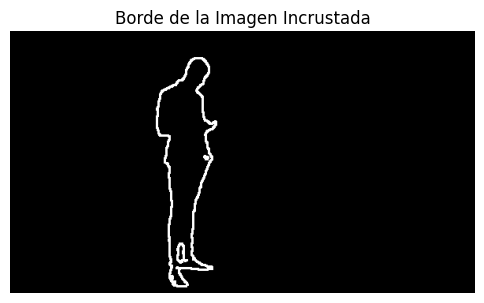

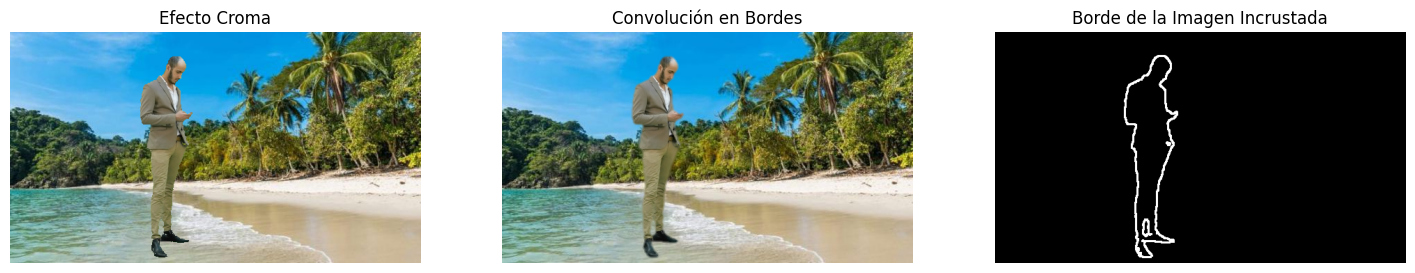

In [5]:
# Cargar los fondos
fondo_verde = cv2.imread('fondo_verde.jpg')
fondo_playa = cv2.imread('playa.jpg')

# Convertir la imagen del fondo verde a espacio de color HSV para segmentar el color verde
hsv = cv2.cvtColor(fondo_verde, cv2.COLOR_BGR2HSV)

# Definir el rango de verde en HSV y crear la máscara
verde_bajo = np.array([40, 40, 40])
verde_alto = np.array([80, 255, 255])
mascara_verde = cv2.inRange(hsv, verde_bajo, verde_alto)

# Invertir la máscara para obtener las áreas que no son verdes (el sujeto)
mascara_sujeto = cv2.bitwise_not(mascara_verde)

# Extraer el sujeto y el fondo usando las máscaras
sujeto = cv2.bitwise_and(fondo_verde, fondo_verde, mask=mascara_sujeto)
fondo = cv2.bitwise_and(fondo_playa, fondo_playa, mask=mascara_verde)

# Combinar ambas partes
resultado_inicial = cv2.add(sujeto, fondo)

# Generar la imagen binaria del borde usando un operador morfológico (para el borde del sujeto)
kernel = np.ones((3, 3), np.uint8)
borde = cv2.Canny(mascara_sujeto, 100, 200)
borde_dilatado = cv2.dilate(borde, kernel, iterations=1)

# Mostrar el borde binario de la imagen incrustada (como en la figura (c) del ejercicio)
plt.figure(figsize=(6, 6))
plt.imshow(borde_dilatado, cmap='gray')
plt.title('Borde de la Imagen Incrustada')
plt.axis('off')
plt.show()

# Aplicar una convolución para suavizar los bordes del sujeto usando una máscara binaria
resultado_final = cv2.inpaint(resultado_inicial, borde_dilatado, 3, cv2.INPAINT_TELEA)

# Mostrar las imágenes: resultado inicial, imagen con convolución en bordes y borde binario
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Imagen con el efecto croma (resultado inicial)
ax[0].imshow(cv2.cvtColor(resultado_inicial, cv2.COLOR_BGR2RGB))
ax[0].set_title('Efecto Croma')
ax[0].axis('off')

# Imagen con la convolución aplicada para atenuar bordes (resultado final)
ax[1].imshow(cv2.cvtColor(resultado_final, cv2.COLOR_BGR2RGB))
ax[1].set_title('Convolución en Bordes')
ax[1].axis('off')

# Imagen del borde de la imagen incrustada
ax[2].imshow(borde_dilatado, cmap='gray')
ax[2].set_title('Borde de la Imagen Incrustada')
ax[2].axis('off')

plt.show()

## Pregunta #3

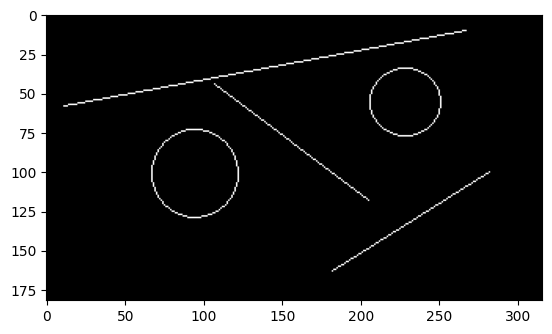

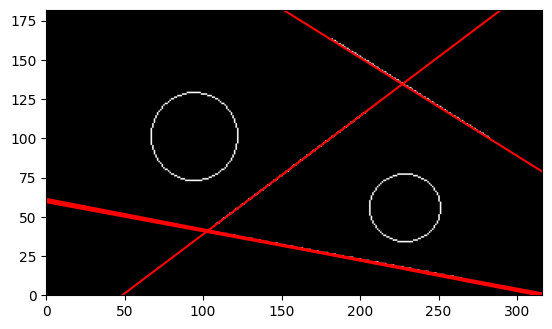

In [6]:
# Cargar y convertir la imagen a binaria
image = cv2.imread('linea2.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_image = binary_image / 255.0

# Mostrar la imagen binaria
plt.imshow(binary_image, cmap='gray')
plt.show()

# Discretización de ángulos y p
step_angle = 0.5
angles = np.deg2rad(np.arange(0, 180 + step_angle, step_angle))
m, n = binary_image.shape
d = np.sqrt(m**2 + n**2)
step_p = 0.5
ps = np.arange(-d, d, step_p)

# Crear la matriz de acumulación
Acumulador = np.zeros((len(angles), len(ps)))

# Llenar la matriz de acumulación
y_indices, x_indices = np.nonzero(binary_image)
for x, y in zip(x_indices, y_indices):
    for ang_ind, ang in enumerate(angles):
        p = x * np.cos(ang) + y * np.sin(ang)
        p_index = np.argmin(np.abs(ps - p))
        Acumulador[ang_ind, p_index] += 1


# Detección de líneas
num_lines = 6
for _ in range(num_lines):
    max_value = np.max(Acumulador)
    ang_index, p_index = np.unravel_index(np.argmax(Acumulador), Acumulador.shape)
    ang_max = angles[ang_index]
    p_max = ps[p_index]

    # Graficar la línea detectada
    if np.abs(np.sin(ang_max)) < 1e-5:  # línea vertical
        x_val = p_max / np.cos(ang_max)
        plt.plot([x_val, x_val], [0, m], 'r')
    else:
        slope = -np.cos(ang_max) / np.sin(ang_max)
        intercept = p_max / np.sin(ang_max)
        x_vals = np.array([1, n])
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, 'r')

    Acumulador[ang_index, p_index] = 0  # Resetear la posición del acumulador

plt.imshow(binary_image, cmap='gray')
plt.xlim([0, n])
plt.ylim([0, m])
plt.show()


## Pregunta #4

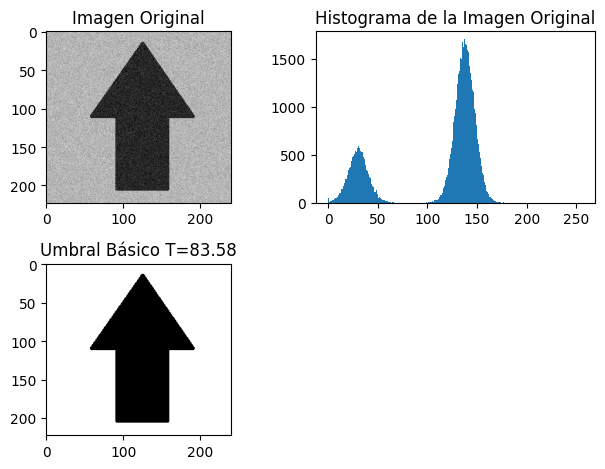

In [7]:
# Cargar la imagen en escala de grises
A = cv2.imread('imagen5.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original
plt.subplot(2, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Imagen Original')

# Histograma de la imagen original
plt.subplot(2, 2, 2)
plt.hist(A.ravel(), bins=256, range=(0, 256))
plt.title('Histograma de la Imagen Original')

# Algoritmo del umbral básico
T = 165  # Umbral inicial
iterMax = 1000
tol = 1e-5

for k in range(iterMax):
    # Crear matrices binarias según el umbral
    I1 = (A > T)
    I2 = (A <= T)
    B1 = A * I1  # Elementos de A mayores a T
    B2 = A * I2  # Elementos de A menores o iguales a T

    # Calcular los promedios de los bloques
    m1 = np.sum(B1) / np.sum(I1)
    m2 = np.sum(B2) / np.sum(I2)

    # Nuevo umbral
    Tn = (m1 + m2) / 2
    er = abs(Tn - T)

    # Condicional de parada
    if er < tol:
        break
    T = Tn

# Crear la imagen umbralizada
C = np.zeros_like(A)
C[A > T] = 1

# Mostrar la imagen umbralizada
plt.subplot(2, 2, 3)
plt.imshow(C, cmap='gray')
plt.title(f'Umbral Básico T={T:.2f}')

plt.tight_layout()
plt.show()


## Pregunta #5

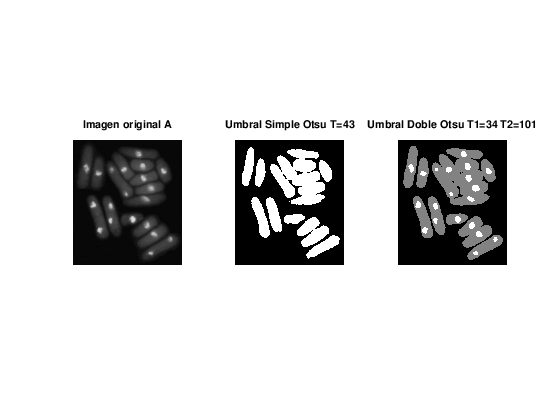

In [8]:
function T=metodo_otsu(A)
  %Paso 0: Calcular el histograma
  [q,~]=imhist(A);

  %Paso 1: Histograma normalizado
  [m,n]=size(A);
  h=q/(m*n); %(1/(m*n))*p

  %Paso 2: Vector de sumas acumuladas
  p=zeros(256,1);
  for k=0:255
    p(k+1)=sum(h(1:k+1));
  end

  %Paso 3: Vector de sumas acumuladas con peso
  mv=zeros(256,1);
  aux=[0:255]'.*h;
  for k=0:255
    mv(k+1)=sum(aux(1:k+1));
  end

  %Paso 4: Valor máximo de mv
  mg=mv(255);

  %Paso 5: Calculo del vecto de varianza
  s=((mg*p-mv).^2)./(p.*(1-p));

  %Paso 6: Calcular el umbral
  [~,T]=max(s);
end

function [T1, T2] = metodo_otsu_doble(A)
  % Paso 0: Calcular el histograma y normalizar
  [q, ~] = imhist(A);
  [m,n]=size(A);
  h=q/(m*n);


  % Paso 0: Calcular sumas acumuladas (P) y medias acumuladas (m)
  P = cumsum(h);
  m = cumsum((0:255)' .* h);
  mg = m(end);
  S = zeros(256, 256); % Inicialización de la matriz de varianzas entre clases

  % Paso 1: Bucle doble para calcular S(k1, k2)
  for k1 = 0:255
    for k2 = k1+1:255

      % Paso 1.1
      P1 = P(k1+1);
      P2 = P(k2+1) - P1;
      P3 = 1 - P(k2+1);

      if P1 > 0 && P2 > 0 && P3 > 0
        % Paso 1.2
        m1 = m(k1+1) / P1;
        m2 = (m(k2+1) - m(k1+1)) / P2;
        m3 = (mg - m(k2+1)) / P3;

        % Paso 1.3: Calcular la matriz de varianza S
        S(k1+1, k2+1) = P1 * (m1 - mg)^2 + P2 * (m2 - mg)^2 + P3 * (m3 - mg)^2;
      end
    end
  end

  % Paso 2: Encontrar los índices donde S alcanza su máximo
  [~, idx] = max(S(:));
  [T1, T2] = ind2sub(size(S), idx);
  T1 -= 1; % Ajustar índices para ser coherentes con el rango 0-255
  T2 -= 1;
end


A=imread('imagen3.jpg');
subplot(1,3,1)
imshow(A)
title('Imagen original A')

%Metodo de Otsu
T=metodo_otsu(A);

%Mostrar la imagen
D=zeros(size(A));
D(A>T)=1;
D(A<=T)=0;
subplot(1,3,2)
imshow(D)
title(['Umbral Simple Otsu T=' num2str(T)])

%Metodo de Otsu doble
[T1, T2]=metodo_otsu_doble(A);

%Mostrar la imagen
E = zeros(size(A));
E(A <= T1) = 0; % Clase 1
E(A > T1 & A <= T2) = 0.5; % Clase 2
E(A > T2) = 1; % Clase 3
subplot(1,3,3)
imshow(E)
title(['Umbral Doble Otsu T1=' num2str(T1) ' T2=' num2str(T2)])

## Pregunta #6

In [9]:
% Compresión %
function Q=cuantificacion(n)
  % n debe estar en el intervalo [0,100[
  Q50 = [16 11 10 16 24  40  51  61;
         12 12 14 19 26  58  60  55;
         14 13 16 24 40  57  59  56;
         14 17 22 29 51  87  80  62;
         18 22 37 56 68  109 103 77;
         24 35 55 64 81  104 113 92;
         49 64 78 87 103 121 120 101;
         72 92 95 98 112 100 103 99];

  if n==50
    Q=Q50;
  elseif n==0
    Q=ones(8,8);
  elseif and(n>50,n<100)
    Q = round((100-n)/50)*Q50;
  elseif and(0<n,n<50)
    Q = round(50/n)*Q50;
  else
    Q=NaN;
    display('n debe ser un valor en el intervalo [0,100[')
  end

end

% Matriz de tamaño 8x8
A = [154 123 123 123 123 123 123 136;
     192 180 136 154 154 154 136 110;
     254 198 154 154 180 154 123 123;
     239 180 136 180 180 166 123 123;
     180 154 136 167 166 149 136 136;
     128 136 123 136 154 180 198 154;
     123 105 110 149 136 136 180 166;
     110 136 123 123 123 136 154 136];

% Paso 1: Resatr 128 a cada entrada
M = A-128;

% Paso 2: Calcular la DCT-2D
D = dct2(M);

% Paso 3: Obtener la atriz cuantificada
Q = cuantificacion(50);

% Matriz cuantificada
C=round(D./Q)

C =2004h

   10    4    2    5    1    0    0    0
    3    9    1    2    1    0    0    0
   -7   -5    1   -2   -1    0    0    0
   -3   -5    0   -1    0    0    0    0
   -2    1    0    0    0    0    0    0
    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0



## Pregunta #7

In [10]:
function x = mat2vect_diag(A)
    [rows, cols] = size(A);
    x = [];
    if rows ~= 8 || cols ~= 8
        error('La matriz debe ser de tamaño 8x8');
    end

    % Empezar el recorrido zigzag
    % Matriz de salida indexada
    count = 1;
    for s = 2:2*rows
        if mod(s, 2) == 0
            % Diagonal hacia abajo
            for row = s-1:-1:1
                col = s - row;
                if row > 0 && row <= rows && col > 0 && col <= cols
                    x(count) = A(row, col);
                    count = count + 1;
                end
            end
        else
            % Diagonal hacia arriba
            for col = s-1:-1:1
                row = s - col;
                if row > 0 && row <= rows && col > 0 && col <= cols
                    x(count) = A(row, col);
                    count = count + 1;
                end
            end
        end
    end

    % Truncar el vector al último elemento no-cero
    last_non_zero = max(find(x~=0));
    x = x(1:last_non_zero);
end


function C = vect2mat_diag(x)
    C = zeros(8, 8);  % Predefinir la matriz de salida
    index = 1;
    rows = 8;
    cols = 8;

    for s = 2:2*rows
        if mod(s, 2) == 0
            % Diagonal hacia abajo
            for row = s-1:-1:1
                col = s - row;
                if row > 0 && row <= rows && col > 0 && col <= cols
                    C(row, col) = x(index);
                    index = index + 1;
                    if index > length(x)
                        return;
                    end
                end
            end
        else
            % Diagonal hacia arriba
            for col = s-1:-1:1
                row = s - col;
                if row > 0 && row <= rows && col > 0 && col <= cols
                    C(row, col) = x(index);
                    index = index + 1;
                    if index > length(x)
                        return;
                    end
                end
            end
        end
    end
end

A = [
    1  9  17  25  33  41  49  57;
    2  10 18  26  34  42  50  58;
    3  11 19  27  35  43  51  0 ;
    4  12 20  28  36  44  0   0 ;
    5  13 21  29  37  0   0   0 ;
    6  14 22  30  0   0   0   0 ;
    7  15 23  0   0   0   0   0 ;
    8  16 0   0   0   0   0   0
];

x = mat2vect_diag(A)
C = vect2mat_diag(x)

x =2004h

 Columns 1 through 16:

    1    9    2    3   10   17   25   18   11    4    5   12   19   26   33   41

 Columns 17 through 32:

   34   27   20   13    6    7   14   21   28   35   42   49   57   50   43   36

 Columns 33 through 43:

   29   22   15    8   16   23   30   37   44   51   58

C =2004h

    1    9   17   25   33   41   49   57
    2   10   18   26   34   42   50   58
    3   11   19   27   35   43   51    0
    4   12   20   28   36   44    0    0
    5   13   21   29   37    0    0    0
    6   14   22   30    0    0    0    0
    7   15   23    0    0    0    0    0
    8   16    0    0    0    0    0    0



## Pregunta #8

Numero de elementos de A = 369036
Numero de elementos almacenado en Xr y Yr = 133650
Razon de Compresion de Ar = 0.36215978928884984


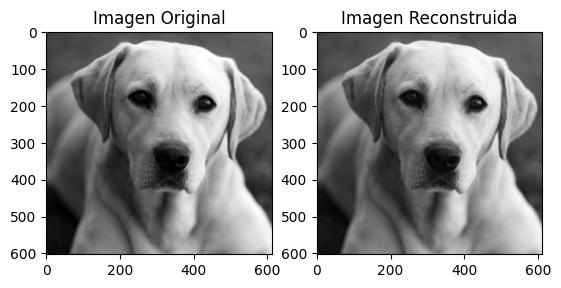

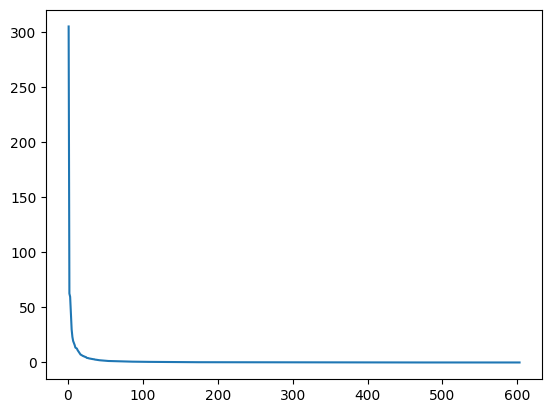

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def rango_reducido(A, r):
    if r > min(A.shape):
        raise ValueError('r debe ser menor o igual que las dimensiones de la matriz A')
    
    U, S, Vt = svd(A, full_matrices=False)
    Ur = U[:, :r]
    Vr = Vt[:r, :]
    Sr = diagsvd(S[:r], r, r)
    
    Xr = Ur @ Sr
    Yr = Vr
    return Xr, Yr

def r_optimo95(A):
    s = svd(A, compute_uv=False)
    total_var = np.sum(s)
    
    for r in range(1, len(s)+1):
        if np.sum(s[:r]) / total_var > 0.95:
            return r

# Cargar y procesar la imagen
img = Image.open('img1.jpg').convert('L')
A = np.array(img, dtype=np.float64) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Imagen Original')
np.savetxt('originalImage.txt', A)

m, n = A.shape
print(f'Numero de elementos de A = {m*n}')

r = r_optimo95(A)
Xr, Yr = rango_reducido(A, r)
m1, n1 = Xr.shape
m2, n2 = Yr.shape
print(f'Numero de elementos almacenado en Xr y Yr = {m1*n1 + m2*n2}')

np.savetxt('matrixXr.txt', Xr)
np.savetxt('matrixYr.txt', Yr)

Ar = Xr @ Yr

print(f'Razon de Compresion de Ar = {((m*r + r*n) / (m*n))}')

plt.subplot(1, 2, 2)
plt.imshow(Ar, cmap='gray')
plt.title('Imagen Reconstruida')
plt.show()

plt.figure()
s = svd(A, compute_uv=False)
plt.plot(range(1, len(s)+1), s)
plt.show()


## Pregunta #9

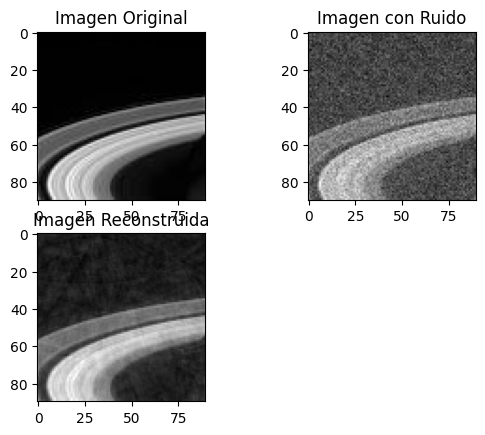

In [12]:
folder = 'imagen_nasa_saturno'

# Leer la primera imagen para obtener las dimensiones
img_path = os.path.join(folder, 'saturno (1).jpg')
A1 = Image.open(img_path)
m, n = A1.size
A1 = np.array(A1, dtype=np.float64) / 255.0

# Obtener lista de todas las imágenes jpg en el directorio
img_files = [f for f in os.listdir(folder) if f.endswith('.jpg')]
num_img = len(img_files)

# Inicializar matrices A y B
A = np.zeros((m * n, num_img))
B = np.zeros((m * n, num_img))

# Nivel de ruido
sigma = 0.1

# Obtener matrices A y B de entrenamiento
for i, file in enumerate(img_files):
    img_path = os.path.join(folder, file)
    C = Image.open(img_path)
    C = np.array(C, dtype=np.float64) / 255.0
    A[:, i] = C.flatten()
    R = C + sigma * np.random.randn(*C.shape)
    B[:, i] = R.flatten()

# Obtener el Super Filtro
F = A @ np.linalg.pinv(B)

# Limpiar una nueva imagen con ruido
Xnew = Image.open('imgN.jpg')
Xnew = np.array(Xnew, dtype=np.float64) / 255.0
plt.subplot(2, 2, 1)
plt.imshow(Xnew, cmap='gray')
plt.title('Imagen Original')

Ynew = Xnew + sigma * np.random.randn(*Xnew.shape)  # Imagen con Ruido
plt.subplot(2, 2, 2)
plt.imshow(Ynew, cmap='gray')
plt.title('Imagen con Ruido')

bt = Ynew.flatten()  # Imagen Vectorizada

at = F @ bt

Xrec = at.reshape(Xnew.shape)
plt.subplot(2, 2, 3)
plt.imshow(Xrec, cmap='gray')
plt.title('Imagen Reconstruida')

plt.show()
